# Logistic Regression

##### Importing libraries

In [1]:
import pandas as pd # data analytical library
import numpy as np #fast linear algebra
import matplotlib.pyplot as plt #visualization
import seaborn as sns #statistical visualization

##### Importing the data

In [2]:
df=pd.read_csv("train.csv")

##### Viewing the first 5 rows

In [3]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

##### DatatypeTransformations

In [6]:
df['Date.of.Birth']

0         01-01-84
1         31-07-85
2         24-08-85
3         30-12-93
4         09-12-77
            ...   
233149    01-08-88
233150    05-12-88
233151    01-06-76
233152    26-03-94
233153    18-02-84
Name: Date.of.Birth, Length: 233154, dtype: object

In [7]:
df['Date.of.Birth']=pd.to_datetime(df['Date.of.Birth'])

In [8]:
df['DisbursalDate']=pd.to_datetime(df['DisbursalDate'])

In [9]:
df['Date.of.Birth']

0        1984-01-01
1        1985-07-31
2        1985-08-24
3        1993-12-30
4        1977-09-12
            ...    
233149   1988-01-08
233150   1988-05-12
233151   1976-01-06
233152   1994-03-26
233153   1984-02-18
Name: Date.of.Birth, Length: 233154, dtype: datetime64[ns]

##### Creating age column 

In [10]:
df['age']=(pd.to_datetime('now')-df['Date.of.Birth']).astype('<m8[Y]')

In [11]:
df['CREDIT.HISTORY.LENGTH']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          1yrs 3mon
4          0yrs 0mon
             ...    
233149     3yrs 3mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: object

In [12]:
def str_int(data):
    yy,mm=data.split(' ')
    return 12*(int(yy[:-3])+int(mm[:-3]))

In [13]:
df['credit_history_length']=df['CREDIT.HISTORY.LENGTH'].apply(str_int)

In [14]:
df['Avg.acc.age']=df['AVERAGE.ACCT.AGE'].apply(str_int)

#### Missing value analysis and treatment 

In [ ]:
df.isnull().sum()

In [15]:
df['Employment.Type']=df['Employment.Type'].fillna(df['Employment.Type'].mode()[0])

In [16]:
df.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [17]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'age', 'credit_history_length', 'Avg.acc.age'],
      dtype='object')

In [18]:
col_ML=[ 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 
       'Employment.Type',  'State_ID', 
        'PERFORM_CNS.SCORE',
        'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
        'NO.OF_INQUIRIES',
       'loan_default', 'age', 'credit_history_length', 'Avg.acc.age']

In [19]:
data_ml=df[col_ML]

In [20]:
data_ml.select_dtypes('object').head()

,Employment.Type
0,Salaried
1,Self employed
2,Self employed
3,Self employed
4,Self employed


In [21]:
data_ml['Employment.Type']=data_ml['Employment.Type'].replace({"Salaried":0,"Self employed":1})

<ipython-input-21-a05bcf3fd1b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['Employment.Type']=data_ml['Employment.Type'].replace({"Salaried":0,"Self employed":1})


In [22]:
features=data_ml.drop('loan_default',axis=1)
features

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Employment.Type,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,age,credit_history_length,Avg.acc.age
0,50578,58400,89.55,67,22807,45,0,6,0,0,...,0,0,0,0,0,0,0,37.0,0,0
1,47145,65550,73.23,67,22807,45,1,6,598,1,...,0,0,1991,0,0,1,0,35.0,144,144
2,53278,61360,89.63,67,22807,45,1,6,0,0,...,0,0,0,0,0,0,0,35.0,0,0
3,57513,66113,88.48,67,22807,45,1,6,305,3,...,0,0,31,0,0,0,1,27.0,48,96
4,52378,60300,88.39,67,22807,45,1,6,0,0,...,0,0,0,0,0,0,1,43.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,0,6,735,4,...,0,0,4084,0,0,0,0,33.0,72,120
233150,73651,100600,74.95,34,23775,51,1,6,825,1,...,0,0,1565,0,0,0,0,33.0,72,72
233151,33484,71212,48.45,77,22186,86,0,4,0,0,...,0,0,0,0,0,0,0,45.0,0,0
233152,34259,73286,49.10,77,22186,86,0,4,0,0,...,0,0,0,0,0,0,0,27.0,0,0


In [23]:
outcome=data_ml['loan_default']

#### Min max scaling

In [24]:
import sklearn.preprocessing as pre
import sklearn.model_selection as ms

In [25]:
feature_scale=pre.minmax_scale(features)

#### Train test splitting

In [26]:
x_train,x_test,y_train,y_test=ms.train_test_split(feature_scale,outcome,test_size=0.3,random_state=12345)

In [27]:
x_train.shape

(163207, 29)

In [28]:
x_test.shape

(69947, 29)

In [29]:
y_test.shape

(69947,)

#### Model

In [30]:
import sklearn.linear_model as glm

In [31]:
Logistics_1=glm.LogisticRegression(n_jobs=-1,max_iter=600)

In [32]:
Logistics_1.fit(x_train,y_train)

LogisticRegression(max_iter=600, n_jobs=-1)

#### Model performance

In [33]:
Logistics_1.score(x_train,y_train)

0.7821110614128071

In [34]:
Logistics_1.score(x_test,y_test)

0.7837362574520709

#### Model evaluation

In [ ]:
y_pred=Logistics_1.predict(x_test)

In [36]:
import sklearn.metrics as mt

In [37]:
mt.confusion_matrix(y_test,y_pred)

array([[54781,    69],
       [15058,    39]], dtype=int64)

In [38]:
print(mt.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54850
           1       0.36      0.00      0.01     15097

    accuracy                           0.78     69947
   macro avg       0.57      0.50      0.44     69947
weighted avg       0.69      0.78      0.69     69947



In [39]:
pd.crosstab(index=outcome.rename('Actual'),columns=pd.Series(y_pred,name='Predicted'))

Predicted,0,1
Actual,,
0,55681,88
1,14158,20


## 1.Why the model performance for class 1 is not good ?

there is a class imbalance problem and the model is biased towards one class as illustrated below there are almost 4 times more record of class 0 as compared to class 1.

In [40]:
data_ml['loan_default'].value_counts() ## there is a class imbalance problem and the model is biased towards one

0    182543
1     50611
Name: loan_default, dtype: int64

C:\Users\prathibha k s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


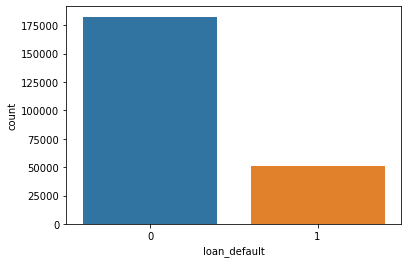

In [41]:
sns.countplot(data_ml['loan_default'])

## 2.How do i imporve the model score?

One obvious thing we could do is drop some random records of class 0 inorder to balance the records of two classes .In other words we can try random undersampling on the majority class

In [42]:
data_0=data_ml[data_ml['loan_default']==0].sample(50000)
data_0

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Employment.Type,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age,credit_history_length,Avg.acc.age
124337,55359,69942,80.64,34,16556,86,1,6,701,5,...,0,6084,0,1,0,0,0,29.0,132,132
16955,59213,67830,89.93,61,20582,86,1,6,763,3,...,0,0,0,0,1,0,0,41.0,48,84
62852,54259,84543,66.24,10,23219,86,1,3,0,0,...,0,0,0,0,0,0,0,31.0,0,0
100962,48595,75846,65.92,2,23550,120,0,4,0,0,...,0,0,0,0,0,0,0,24.0,0,0
207274,62713,90797,69.94,66,21167,86,0,17,16,2,...,0,0,0,0,0,0,0,37.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182065,44122,66965,67.20,72,16866,86,1,11,0,0,...,0,0,0,0,0,0,0,47.0,0,0
178446,43394,61577,71.46,136,22506,45,0,8,0,0,...,0,0,0,0,0,0,0,39.0,0,0
121169,52478,80461,68.36,255,23415,45,1,3,0,0,...,0,0,0,0,0,0,0,22.0,0,0
112864,46164,69719,71.72,104,20690,86,0,10,17,1,...,0,0,0,1,0,0,0,36.0,24,24


In [43]:
data_1=data_ml[data_ml['loan_default']==1]
data_1

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Employment.Type,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age,credit_history_length,Avg.acc.age
1,47145,65550,73.23,67,22807,45,1,6,598,1,...,0,1991,0,0,1,0,1,35.0,144,144
3,57513,66113,88.48,67,22807,45,1,6,305,3,...,0,31,0,0,0,1,1,27.0,48,96
4,52378,60300,88.39,67,22807,45,1,6,0,0,...,0,0,0,0,0,1,1,43.0,0,0
10,53278,61230,89.83,67,22807,45,1,6,300,1,...,0,2270,0,0,0,0,1,42.0,84,84
12,53278,61330,89.68,67,22807,45,0,6,300,7,...,0,3300,0,0,0,0,1,47.0,132,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233110,56013,77476,74.86,36,15372,45,1,13,615,2,...,0,0,0,0,0,0,1,32.0,60,156
233120,58759,94557,63.45,101,24031,120,1,15,305,3,...,0,3704,0,0,0,0,1,35.0,24,108
233121,57513,74759,78.92,101,24031,120,0,15,537,5,...,0,8628,0,0,0,0,1,38.0,48,36
233122,47849,68027,72.03,101,24031,120,0,15,738,1,...,0,1736,0,1,0,0,1,27.0,36,36


In [44]:
balanced_data=pd.concat([data_1,data_0],axis='rows').sample(frac=1)

C:\Users\prathibha k s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


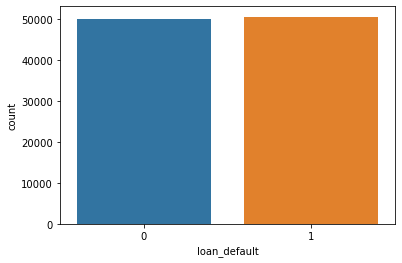

In [45]:
sns.countplot(balanced_data['loan_default'])

In [46]:
balanced_data.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Employment.Type,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age,credit_history_length,Avg.acc.age
42247,31484,47300,67.65,9,23536,51,1,3,0,0,...,0,0,0,0,0,0,1,46.0,0,0
44297,59947,81600,75.98,152,17964,86,1,3,0,0,...,0,0,0,0,0,0,1,33.0,0,0
128994,35939,74042,49.97,9,18066,86,1,3,0,0,...,0,0,0,0,0,0,0,-46.0,0,0
156414,36939,69540,54.64,34,22637,86,1,6,691,6,...,0,0,0,0,0,0,0,43.0,96,108
114229,46349,62465,76.84,3,18180,86,1,1,726,8,...,0,1494,0,1,0,1,0,-38.0,48,24


In [47]:
predictor=balanced_data.drop('loan_default',axis='columns').apply(pre.minmax_scale)

In [48]:
predictor

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Employment.Type,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,age,credit_history_length,Avg.acc.age
42247,0.018538,0.006470,0.678122,0.030769,0.911268,0.054054,1.0,0.095238,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.96,0.000000,0.000000
44297,0.047665,0.028015,0.776156,0.580769,0.521045,0.369369,1.0,0.095238,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.83,0.000000,0.000000
128994,0.023097,0.023268,0.470048,0.030769,0.528188,0.369369,1.0,0.095238,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.04,0.000000,0.000000
156414,0.024120,0.020440,0.525009,0.126923,0.848309,0.369369,1.0,0.238095,0.776404,0.013245,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.93,0.205128,0.230769
114229,0.033749,0.015996,0.786278,0.007692,0.536172,0.369369,1.0,0.000000,0.815730,0.017660,...,0.0,0.0,0.000072,0.0,0.035714,0.0,0.027778,0.12,0.102564,0.051282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160102,0.042616,0.017086,0.926915,0.034615,0.873100,0.369369,1.0,0.095238,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.76,0.000000,0.000000
9925,0.043891,0.022477,0.819819,0.061538,0.687093,0.369369,1.0,0.761905,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.82,0.000000,0.000000
64513,0.032214,0.022120,0.623514,0.030769,0.539183,0.369369,1.0,0.095238,0.337079,0.004415,...,0.0,0.0,0.000235,0.0,0.000000,0.0,0.027778,0.92,0.230769,0.102564
221451,0.044198,0.021922,0.831352,0.007692,0.475243,0.675676,1.0,0.000000,0.704494,0.004415,...,0.0,0.0,0.000122,0.0,0.000000,0.0,0.000000,0.15,0.051282,0.282051


In [49]:
response=balanced_data["loan_default"]

In [50]:
response.shape

(100611,)

In [51]:
x_train,x_test,y_train,y_test=ms.train_test_split(predictor,response,random_state=12345,test_size=0.3)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
RF=RandomForestClassifier()

In [54]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
RF.score(x_train,y_train) ##problem with undersampling overfitting takes place

0.9995314297073565

In [56]:
RF.score(x_test,y_test)

0.5954810495626822

In [57]:
y_pred=RF.predict(x_test)

In [58]:
mt.confusion_matrix(y_test,y_pred)

array([[8931, 6148],
       [6062, 9043]], dtype=int64)

In [59]:
print(mt.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59     15079
           1       0.60      0.60      0.60     15105

    accuracy                           0.60     30184
   macro avg       0.60      0.60      0.60     30184
weighted avg       0.60      0.60      0.60     30184



## 3. What preprocessing techniques should i change? 
By trying out some random oversampling by denerating duplicate smaples

In [60]:
data_1=data_ml[data_ml['loan_default']==1].sample(130000,replace=True)

In [61]:
balanced_datan=pd.concat([data_ml,data_1],axis='rows',ignore_index=True).sample(frac=1)

C:\Users\prathibha k s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


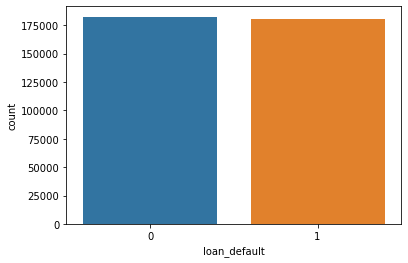

In [62]:
sns.countplot(balanced_datan['loan_default'])

In [63]:
predictor=balanced_datan.drop('loan_default',axis='columns').apply(pre.minmax_scale)
predictor

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Employment.Type,State_ID,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,age,credit_history_length,Avg.acc.age
200463,0.029853,0.020595,0.640814,0.000000,0.528328,0.369369,1.0,0.095238,0.700000,0.017660,...,0.0,0.0,0.000000,0.0,0.114286,0.05,0.000000,0.92,0.261905,0.179487
13664,0.036079,0.025736,0.644227,0.246154,0.776875,0.369369,1.0,0.571429,0.939326,0.002208,...,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.94,0.285714,0.307692
269200,0.036590,0.013996,0.894433,0.069231,0.863716,0.369369,1.0,0.142857,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.93,0.000000,0.000000
112547,0.035742,0.015943,0.815817,0.253846,0.914490,0.054054,1.0,0.238095,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00,0.055556,0.91,0.000000,0.000000
230,0.036868,0.018020,0.777804,0.126923,0.327194,0.369369,0.0,0.238095,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.85,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38739,0.025842,0.020027,0.582441,0.296154,0.439737,0.369369,1.0,0.142857,0.459551,0.011038,...,0.0,0.0,0.000616,0.0,0.000000,0.05,0.000000,0.90,0.285714,0.333333
352431,0.060683,0.035663,0.810639,0.046154,0.534001,0.369369,0.0,0.333333,0.815730,0.030905,...,0.0,0.0,0.000000,0.0,0.057143,0.00,0.000000,0.81,0.166667,0.025641
55986,0.036868,0.023105,0.679534,0.242308,0.809020,0.369369,1.0,0.380952,0.795506,0.015453,...,0.0,0.0,0.000442,0.0,0.085714,0.00,0.055556,0.88,0.142857,0.230769
178715,0.020784,0.023029,0.447570,0.134615,0.817564,0.036036,0.0,0.571429,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.84,0.000000,0.000000


In [64]:
response=balanced_datan["loan_default"]

In [65]:
response

200463    0
13664     0
269200    1
112547    0
230       0
         ..
38739     0
352431    1
55986     0
178715    0
337790    1
Name: loan_default, Length: 363154, dtype: int64

In [66]:
x_train,x_test,y_train,y_test=ms.train_test_split(predictor,response,random_state=12345,test_size=0.3)

In [67]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
print("train score :",RF.score(x_train,y_train))
print("test score :",RF.score(x_test,y_test))

train score : 0.9995554803762288
test score : 0.9144721745435854


In [69]:
y_pred=RF.predict(x_test)

In [70]:
mt.confusion_matrix(y_test,y_pred) ## false positives are minimised

array([[48994,  5662],
       [ 3656, 50635]], dtype=int64)

In [71]:
print(mt.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     54656
           1       0.90      0.93      0.92     54291

    accuracy                           0.91    108947
   macro avg       0.91      0.91      0.91    108947
weighted avg       0.92      0.91      0.91    108947



Preprocessing
1. Binning
2. Dummy of cat data(one hot encoding)
3. feature selection using feature importance

In [72]:
print(mt.mean_squared_error(y_test,Logistics_1.predict(x_test)))

0.49731520831229864


In [73]:
np.sum(y_test.ravel()-Logistics_1.predict(x_test)) #overall sum of loss

54033

In [74]:
indexs,counts=np.unique(Logistics_1.predict(x_test),return_index=False, return_counts=True)
indexs,counts

(array([0, 1], dtype=int64), array([108689,    258], dtype=int64))